# <center> Module 3

Group: 12<br>
Darko Petrov<br>
Alexander Lendon

#### 1

**Q1.a)** The orthogonal projection of a point onto an ℓ2 ball can be found by solving the following optimization problem:

$$\min_{y} \frac{1}{2}||y - x||^2_2 \quad \text{s.t.} \quad ||y||^2_2 \leq r^2$$

The Lagrangian of this problem is:

$$L(y, \lambda) = \frac{1}{2}||y - x||^2_2 + \lambda(||y||^2_2 - r^2)$$

Finding the KKT Conditions:
1. Stationarity: $$\nabla_yL = y- x + 2\lambda y =0 $$
2. Primal Feasibility: $$ ||y||_2^2 - r^2 \leq 0$$
3. Dual Feasibility: $$ \lambda \geq 0 $$
4. Complementary slackness: $$ \lambda(||y||^2_2 - r^2)=0 $$

Rearranging stationarity condition for y gives:

$$y = \frac{x}{1 + 2\lambda}$$

Substituting this back into the complementary slackness condition:
$$
\lambda\left(\left|\left|\frac{x}{1+2\lambda}\right|\right|_2^2-r^2\right)=0
$$

This gives two valid soltuions depending on the position of x. Considering the lagranginan multiplier acts as a penalty function for positions which exceed the constaint of the $\mathcal{l2}$ ball.
1. If $||x||_2\leq r$:
$$ \lambda= 0$$
2. If $||x||_2> r$
$$\frac{||x||^2_2}{(1 + 2\lambda)^2} - r^2 = 0$$

Solving for λ gives:

$$\lambda = \frac{1}{2}\left(\frac{||x||_2}{r} - 1\right)$$

Therefore, substituting this back into the expression for $y$:
1. $||x||_2\leq r$
$$
y = \frac{x}{1+2(0)} = x
$$
2. $||x||_2> r$
$$
y = \frac{x}{1+2\cdot\frac{1}{2}(\frac{||x||_2}{r}- 1)} = \frac{r x}{||x||_2}
$$ 
And the projection is given by:

$$\text{proj}_S(x) = \begin{cases} 
\frac{r x}{||x||_2} & \text{if } ||x||_2 \geq r \\
x & \text{if } ||x||_2 < r 
\end{cases}$$

**Q1.b)** The optimal solution to the given problem can be found by taking the derivative of the objective function with respect to y and setting it to zero:

$$\nabla_y = y - x + \lambda \text{sign}(y) = 0$$

Considering an optimal solution exists where x could be negative we have three cases:
1. $x \geq \lambda $
2. $x \leq -\lambda$
3. $x \in (-\lambda, \lambda)  $ 

Solving for y gives the shrinkage operator for each case:
$$y = \begin{cases} 
x - \lambda &   \text{if } x \geq \lambda \\
x + \lambda &   \text{if } x \leq -\lambda \\
0 &             \text{if } x \in (-\lambda, \lambda) 
\end{cases}$$



**Q1.c)** The orthogonal projection onto an l1 ball can be found by solving the following optimization problem:

$$
\min_{y} \frac{1}{2}||y - x||^2_2 \quad \text{s.t.} \quad |y_1| + |y_2| + . . . + |y_m|_1 \leq r
$$
with an l1 ball defined as the set:
$$
S = \{y = (y_1, y_2, . . . , y_m) | |y_1| + |y_2| + . . . + |y_m| \leq r\}
$$

The Lagrangian of this problem is:

$$
L(y, \lambda) = \frac{1}{2}\|y - x\|^2_2 + \lambda (|y_1| + |y_2| + . . . + |y_m| - r)
$$

    
The KKT conditions are then given by:
1. Stationarity: $$\nabla_y L = y - x + \lambda \cdot \text{sign}(y) = 0$$
2. Primal feasibility: $$|y_1| + |y_2| + . . . + |y_m| - r \leq 0$$
3. Dual feasibility: $$\lambda \geq 0$$
4. Complementary slackness: $$\lambda (|y_1| + |y_2| + . . . + |y_m| - r) = 0$$

Rearranging stationarity condition for y gives:
$$
y = x - \lambda\text{sign}(y) 
$$
The dual gradient ascent algorithm updates $\lambda$ iteratively until convergence. At each iteration, it computes the gradient of the dual function and takes a step in the direction of the gradient scaled by $\eta$, the learning rate. The update rule for $\lambda$ is given by:
$$
\lambda^{(t+1)} = \lambda^{(t)} + \eta \nabla_\lambda L
$$

With the gradient of the dual function given by:
$$
\nabla_\lambda L = |y_1| +|y_2|+...+|y_m|-r
$$
The initial value of lambda can be selected manually or a pre-solver can be run to find a good estimate.

<!---The dual problem is then given by:

$$\max_{\lambda \geq 0} -\frac{r^2}{4\lambda} - \frac{1}{2}||x - \lambda \text{sign}(x)||^2_2$$

The dual gradient ascent algorithm can be used to solve this dual problem and find the projection. The update rule for the dual variable λ is given by:

$$\lambda^{(k+1)} = \lambda^{(k)} + \eta(||x - \lambda^{(k)} \text{sign}(x)||_1 - r)$$

where η is the step size. The projection is then given by the shrinkage operator:

$$\text{proj}_S(x) = x - \lambda \text{sign}(x)$$  --->




**Q1.d)** The orthogonal projection of a point $x$ onto an ℓ∞ ball $S$, can be given by this optimization problem:

$$
\arg\min_{y \in S} \frac{1}{2}\|y - x\|^2_2
$$

where $S$ is the $l_\infin$ ball defined as:

$$
S = \{y = (y_1, y_2, . . . , y_m) | |y_i| \leq r, i = 1, 2, . . . ,m\}
$$

The orthogonal projection of $x$ onto the ℓ∞ ball is the point in $S$ that is closest to $x$ in terms of the Euclidean distance. This point is obtained by "clipping" each coordinate of $x$ to the interval $[-r, r]$. This can be expressed as:

$$
y_i =
\begin{cases}
r & \text{if } x_i \geq r \\
-r & \text{if } x_i \leq -r \\
x_i & \text{if } x_i \in (-r, r)
\end{cases}
$$

This operation ensures that each coordinate of $y$ lies within the interval $[-r, r]$, so $y$ belongs to the ℓ∞ ball. Among all points in the ℓ∞ ball, $y$ is the one that minimizes the Euclidean distance to $x$.

#### 2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

def L1projection(x,r):
    #x is the point and r is the radius
    # Implement the dual gradient ascend algorithm with a suitable step size
    n = len(x)
    u = np.abs(x)
    if u.sum() <= r:
        # return if x is within the radius
        return x
    w = np.sort(u)[::-1]
    # take the cumulative sum of and rearrange in descending order
    cssv = np.cumsum(w) - r
    ind = np.arange(n) + 1
    # calculate the theta values for all indices
    cond = w - cssv / ind > 0
    rho = ind[cond][-1]
    theta = cssv[cond][-1] / float(rho)
    # choose the largest theta that satisfies the constraint
    w = np.maximum(x - theta, 0)
    w *= np.sign(x)
    return w


def L2projection(x,r):
    #x is the point and r is the radius
    # Implement by the closed form expression
    x_norm = np.linalg.norm(x)
    if x_norm >= r:
        return (r*x)/x_norm
    elif x_norm < r:
        return x
    else:
        raise ValueError("You have non numeric values in your input")

def LINFprojection(x,r):
    #x is the point and r is the radius
    # Implement by the closed form expression
    return np.clip(x, -r, r)



def gradient(x, y, theta, mu):
    grad_theta = -sum((((y - np.dot(x, theta.T) - mu)*x.T).T))
    grad_mu = -sum(y - np.dot(x, theta.T) - mu)
    return grad_theta, grad_mu

def PGD(x, y, theta, mu, learning_rate, r, projection):
    objectivevalue = []
    his_theta = []
    his_mu = []
    for _ in range(T):
        # calculate the gradients and apply GD
        grad_theta, grad_mu = gradient(x, y, theta, mu)
        # Apply projection
        theta = projection(theta - learning_rate * grad_theta, r)
        mu = mu - learning_rate * grad_mu
        # calculate the objective value and store it
        objectivevalue.append(sum((y - np.dot(x, theta.T) - mu)**2))
        his_theta.append(theta)
        his_mu.append(mu)  
    return objectivevalue, his_theta, his_mu
# Implemnt PGD
# step size: mu=...
# number of iterations: T
# initialize theta ,mu
T = 1000




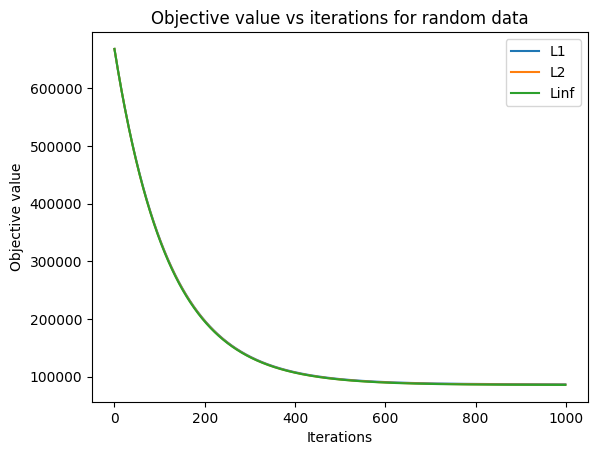

In [5]:
# Example usage
n = 414
d = 7
X = np.random.normal(size=(n, d), loc=0, scale=1)
y = np.random.normal(size=n, loc=38, scale=13.6)

theta = np.ones(d)*0
mu = 0
learning_rate = 1e-5
r = 1
plt.title("Objective value vs iterations for random data")
obj_v_l1, _, _  = PGD(X, y, theta, mu, learning_rate, r, L1projection)
plt.plot(obj_v_l1, label="L1")
obj_v_l2, _, _ = PGD(X, y, theta, mu, learning_rate, r, L2projection)
plt.plot(obj_v_l2, label="L2")
obj_v_linf, _, _= PGD(X, y, theta, mu, learning_rate, r, LINFprojection)
plt.plot(obj_v_linf, label="Linf")
plt.xlabel("Iterations")
plt.ylabel("Objective value")
plt.legend()
plt.show()

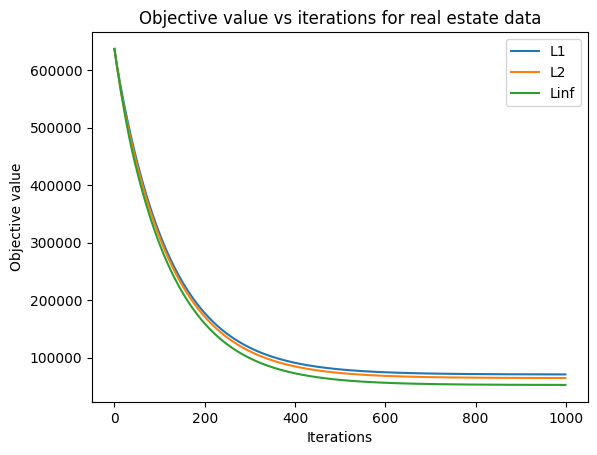

In [7]:
import pandas
data0=pandas.read_csv('Real estate.csv')
data = data0.drop('Y house price of unit area', axis=1)
data = data.drop('No', axis=1)
y = data0['Y house price of unit area']
X=data.to_numpy()
y = y.to_numpy()
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
theta = np.ones(len(X[0]))*0
mu = 1
learning_rate = 1e-5
r = 1
plt.title("Objective value vs iterations for real estate data")
obj_v_l1, _, _ = PGD(X, y, theta, mu, learning_rate, r, L1projection)
plt.plot(obj_v_l1, label="L1")
obj_v_l2, _, _ = PGD(X, y, theta, mu, learning_rate, r, L2projection)
plt.plot(obj_v_l2, label="L2")
obj_v_linf, _, _ = PGD(X, y, theta, mu, learning_rate, r, LINFprojection)
plt.plot(obj_v_linf, label="Linf")
plt.xlabel("Iterations")
plt.ylabel("Objective value")
plt.legend()
plt.show()

a) 

The learning rate affects the convergence of the algorithm. If the learning rate is too small, the algorithm will take a long time to converge. If the learning rate is too large, the algorithm may not converge at all. The learning rate is a value that is used to update the variable $\theta$ and $\mu$ at each iteration where we calculate new values for the coefficients, and we use the learning rate value to multiply it with the new coefficients and subtracted from the old ones giving us a step with and defined maximum variance. This allows the algorithm take slower steps and not overshoot the minimum. The gradient descent will approach the minimum and if the learning rate is too big it will jump around the minimum and not converge. If the learning rate is too small it will take a long time to reach the minimum, but it will have harder time to overshoot leading to a more stable convergence.

b) and c) see plot below 

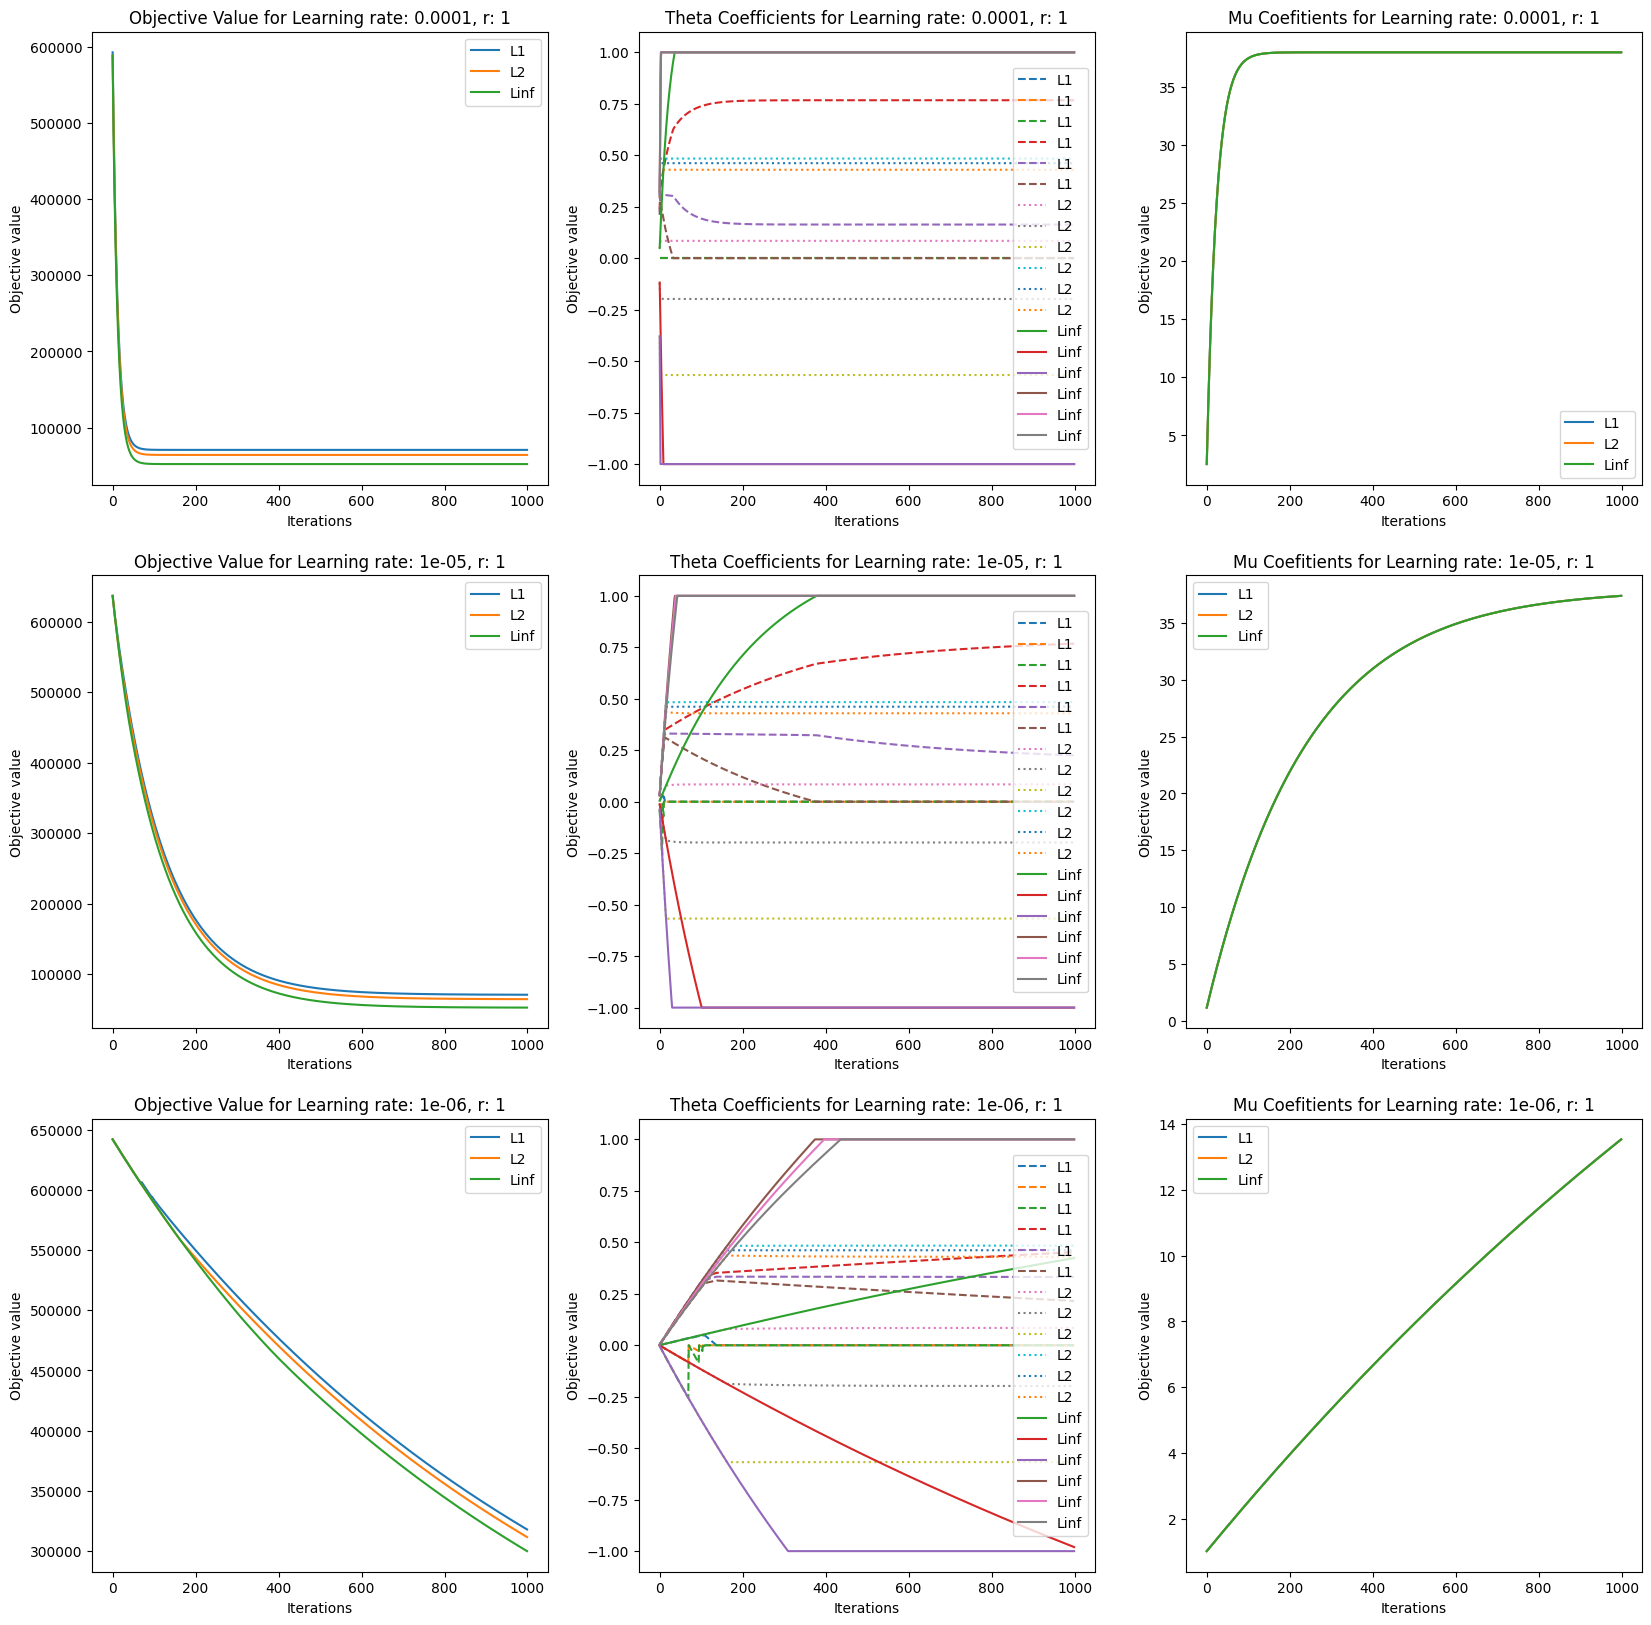

In [4]:
theta = np.ones(len(X[0]))*0
mu = 1
learning_rates = [1e-4, 1e-5, 1e-6]
r = 1
T = 1000

fig, axs = plt.subplots(len(learning_rates), 3, figsize=(20, 20))

for i, learning_rate in enumerate(learning_rates):
    obj_v_l1, his_l1_theta, his_l1_mu  = PGD(X, y, theta, mu, learning_rate, r, L1projection)
    obj_v_l2, his_l2_theta, his_l2_mu = PGD(X, y, theta, mu, learning_rate, r, L2projection)
    obj_v_linf, his_linf_theta, his_linf_mu = PGD(X, y, theta, mu, learning_rate, r, LINFprojection)
    
    axs[i, 0].plot(obj_v_l1, label="L1")
    axs[i, 0].plot(obj_v_l2, label="L2")
    axs[i, 0].plot(obj_v_linf, label="Linf")
    axs[i, 0].set_xlabel("Iterations")
    axs[i, 0].set_ylabel("Objective value")
    axs[i, 0].set_title(f"Objective Value for Learning rate: {learning_rate}, r: {r}")
    axs[i, 0].legend()
    
    axs[i, 1].plot(his_l1_theta, label="L1", linestyle="dashed")
    axs[i, 1].plot(his_l2_theta, label="L2", linestyle="dotted")
    axs[i, 1].plot(his_linf_theta, label="Linf", linestyle="solid")
    axs[i, 1].set_xlabel("Iterations")
    axs[i, 1].set_ylabel("Objective value")
    axs[i, 1].set_title(f"Theta Coefficients for Learning rate: {learning_rate}, r: {r}")
    axs[i, 1].legend()
    
    axs[i, 2].plot(his_l1_mu, label="L1")
    axs[i, 2].plot(his_l2_mu, label="L2")
    axs[i, 2].plot(his_linf_mu, label="Linf")
    axs[i, 2].set_xlabel("Iterations")
    axs[i, 2].set_ylabel("Objective value")
    axs[i, 2].set_title(f"Mu Coefitients for Learning rate: {learning_rate}, r: {r}")
    axs[i, 2].legend()
